# Capstone part 3 - Modeling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
import string
import spacy
import seaborn as sns


In [2]:
rf = RandomForestClassifier()
lr = LogisticRegression(max_iter=10000)
nlp = spacy.load('en_core_web_lg')

stopwords = nlp.Defaults.stop_words

In [3]:
got = pd.read_csv('got_ordered_script.csv')

In [22]:
got.head()

,index,release date,season,episode,episode title,name,gender,class,house,sentence,unnamed: 10
0,277,4/17/2011,Season 1,Episode 1,Winter is Coming,a voice,male,noble,lesser,"It's Maester Luwin, my lord.",2.0
1,3013,6/19/2011,Season 1,Episode 10,Fire and Blood,addam marbrand,male,noble,lesser,ls it true about Stannis and Renly?,2.0
2,3018,6/19/2011,Season 1,Episode 10,Fire and Blood,addam marbrand,male,noble,lesser,Kevan Lannister,2.0
3,4230,4/15/2012,Season 2,Episode 3,What Is Dead May Never Die,aeron greyjoy,male,cleric,none,Kneel.,2.0
4,4231,4/15/2012,Season 2,Episode 3,What Is Dead May Never Die,aeron greyjoy,male,cleric,none,"Let Theon, your servant, be born again from th...",2.0


In [39]:
chars.sort_values('wordcount', ascending=False).head(10)

,gender,class,house,sentence,wordcount,token_list,spacy_doc
name,,,,,,,
tyrion lannister,male,great_house,lannister,Mmh. It is true what they say about the Northe...,26009,"[mmh, true, northern, girl, hear, brother, pre...","(mmh, true, northern, girl, hear, brother, pre..."
cersei lannister,female,great_house,lannister,And you never worry about anything. When we we...,14442,"[worry, seven, jump, cliff, casterly, rock, fo...","(worry, seven, jump, cliff, casterly, rock, fo..."
daenerys targaryen,female,great_house,targaryen,We've been his guests for over a year and he's...,12363,"[guest, year, ask, want, queen, want, home, kn...","(guest, year, ask, want, queen, want, home, kn..."
jon snow,male,great_house,stark,"Go on. Father's watching., And your mother., D...",12298,"[father, watching, mother, think, bran, look, ...","(father, watching, mother, think, bran, look, ..."
jaime lannister,male,great_house,lannister,"As your brother, I feel it's my duty to warn y...",11735,"[brother, feel, duty, warn, afraid, tell, fath...","(brother, feel, duty, warn, afraid, tell, fath..."
sansa stark,female,great_house,stark,"Thank you., Will you shut up?, Would you pleas...",8135,"[thank, shut, shut, think, joffrey, like, thin...","(thank, shut, shut, think, joffrey, like, thin..."
petyr baelish,male,noble,lesser,But we have a Kingdom to look after. I've hope...,7738,"[kingdom, look, hope, meet, time, lord, stark,...","(kingdom, look, hope, meet, time, lord, stark,..."
davos seaworth,male,common,none,"Not now., Stannis is our king. We follow where...",6842,"[stannis, king, follow, lead, like, path, serv...","(stannis, king, follow, lead, like, path, serv..."
samwell tarly,male,noble,lesser,"Samwell Tarly, of Horn Hill. I mean, I was of ...",6519,"[samwell, tarly, horn, hill, mean, horn, hill,...","(samwell, tarly, horn, hill, mean, horn, hill,..."


In [40]:
got.columns = got.columns.str.lower()

In [41]:
chars = got.groupby(['name', 'gender', 'class', 'house'])['sentence'].apply(', '.join).reset_index()

In [42]:
chars.shape
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1500)

In [43]:
punct = string.punctuation

def spacy_tokenizer(sentence):
    
    tokens = nlp(sentence)
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]
    tokens = [word for word in tokens if word not in stopwords and word not in punct]

    return tokens


def clean_text(text):
    
    return text.strip().lower()

class Predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}
    
def simil_score(doc1, doc2):
    
    return doc1.similarity(doc2)

In [44]:
vect = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,2))
tfidf_vect = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [45]:
chars['wordcount'] = chars.sentence.apply(lambda x: len(str(x).split(' ')))
chars['token_list'] = chars.sentence.apply(lambda x: spacy_tokenizer(x))
chars['spacy_doc'] = chars.token_list.apply(lambda x: nlp(' '.join(x)))

In [46]:
chars.head()

,name,gender,class,house,sentence,wordcount,token_list,spacy_doc
0,a voice,male,noble,lesser,"It's Maester Luwin, my lord.",5,"[maester, luwin, lord]","(maester, luwin, lord)"
1,addam marbrand,male,noble,lesser,"ls it true about Stannis and Renly?, Kevan Lan...",9,"[ls, true, stannis, renly, kevan, lannister]","(ls, true, stannis, renly, kevan, lannister)"
2,aeron greyjoy,male,cleric,none,"Kneel., Let Theon, your servant, be born again...",245,"[kneel, let, theon, servant, bear, sea, bless,...","(kneel, let, theon, servant, bear, sea, bless,..."
3,all,none,none,none,Sword! Sword! Sword! Sword! Sword! Sword! Swor...,209,"[sword, sword, sword, sword, sword, sword, swo...","(sword, sword, sword, sword, sword, sword, swo..."
4,alliser thorne,male,noble,lesser,"If that were a real sword, you'd be dead. Lord...",1839,"[real, sword, dead, lord, snow, grow, castle, ...","(real, sword, dead, lord, snow, grow, castle, ..."


In [47]:
top_50 = chars.nlargest(50, 'wordcount')

In [48]:
for name in top_50.name:
    top_50[name] = top_50.name.apply(lambda x: simil_score(chars[chars.name == name].iloc[0].spacy_doc, chars[chars.name == x].iloc[0].spacy_doc))

top_50.set_index('name', inplace=True);

In [49]:
text_cols = ['gender', 'class', 'house', 'sentence', 'clean_text', 'wordcount', 'token_list', 'spacy_doc']
simil_cols = []
for col in top_50:
    if col not in text_cols:
        simil_cols.append(col)

In [50]:
simil_cols

['tyrion lannister',
 'cersei lannister',
 'daenerys targaryen',
 'jon snow',
 'jaime lannister',
 'sansa stark',
 'petyr baelish',
 'davos seaworth',
 'samwell tarly',
 'varys',
 'arya stark',
 'tywin lannister',
 'theon greyjoy',
 'jorah mormont',
 'bronn',
 'brienne',
 'sandor clegane',
 'stannis baratheon',
 'robb stark',
 'olenna tyrell',
 'eddard stark',
 'catelyn stark',
 'bran stark',
 'melisandre',
 'ramsay bolton',
 'margaery tyrell',
 'joffrey lannister',
 'man',
 'high sparrow',
 'robert baratheon',
 'daario naharis',
 'ygritte',
 'tormund giantsbane',
 'roose bolton',
 'gendry baratheon',
 'missandei',
 'oberyn martell',
 'grand maester pycelle',
 'yara greyjoy',
 'alliser thorne',
 'shae',
 'osha',
 'walder frey',
 'gilly',
 'jaqen hghar',
 'tommen lannister',
 'qyburn',
 'talisa maegyr',
 'podrick payne',
 'euron greyjoy']

<AxesSubplot:ylabel='name'>

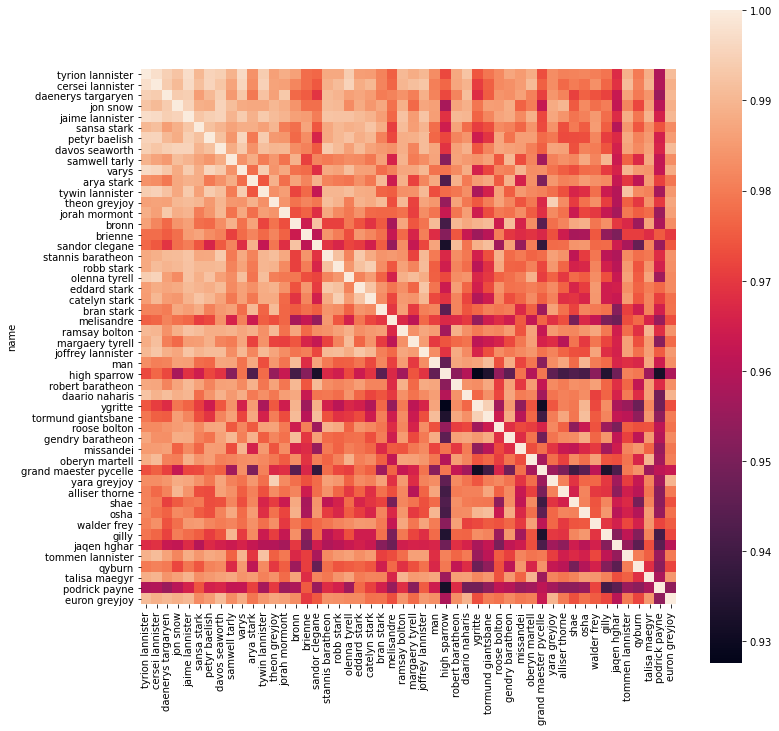

In [51]:
plt.subplots(figsize=(12,12))   
sns.heatmap(top_50[simil_cols], square=True)

In [52]:
def sim (name1, name2):
    score = simil_score(chars[chars.name == name1].iloc[0].spacy_doc, chars[chars.name == name2].iloc[0].spacy_doc)
    return score

print(sim('joffrey lannister', 'robert baratheon'))
print(sim('joffrey lannister', 'jaime lannister'))

0.9878925747964711
0.9924129823487639


In [53]:
print(sim('jon snow', 'eddard stark'))
print(sim('jon snow', 'daenerys targaryen'))

0.9878906382192381
0.9939700487937186


In [54]:
print(sim('tyrion lannister', 'tywin lannister'))
print(sim('jaime lannister', 'tywin lannister'))
print(sim('cersei lannister', 'tywin lannister'))

0.9941259005207069
0.9936557651206782
0.9950318516982171


In [55]:
sim_table = top_50.replace(1.0, np.nan)
sim_table = sim_table[simil_cols]

sim_table.head()

,tyrion lannister,cersei lannister,daenerys targaryen,jon snow,jaime lannister,sansa stark,petyr baelish,davos seaworth,samwell tarly,varys,arya stark,tywin lannister,theon greyjoy,jorah mormont,bronn,brienne,sandor clegane,stannis baratheon,robb stark,olenna tyrell,eddard stark,catelyn stark,bran stark,melisandre,ramsay bolton,margaery tyrell,joffrey lannister,man,high sparrow,robert baratheon,daario naharis,ygritte,tormund giantsbane,roose bolton,gendry baratheon,missandei,oberyn martell,grand maester pycelle,yara greyjoy,alliser thorne,shae,osha,walder frey,gilly,jaqen hghar,tommen lannister,qyburn,talisa maegyr,podrick payne,euron greyjoy
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tyrion lannister,NaN,0.997602,0.994739,0.992629,0.997381,0.990358,0.995340,0.994444,0.989430,0.996803,0.983829,0.994126,0.985868,0.988460,0.986310,0.977903,0.977025,0.987825,0.987818,0.994124,0.985763,0.985534,0.981227,0.975761,0.990401,0.988233,0.990283,0.983021,0.972335,0.987393,0.992639,0.974287,0.979283,0.982458,0.987003,0.985274,0.988358,0.973235,0.982787,0.980845,0.981312,0.981661,0.980582,0.978802,0.967678,0.989184,0.979743,0.988429,0.958995,0.991022
cersei lannister,0.997602,NaN,0.993871,0.990871,0.996888,0.991667,0.995729,0.992674,0.986731,0.995916,0.982868,0.995032,0.986467,0.986045,0.981813,0.977896,0.974678,0.988915,0.991161,0.995359,0.988346,0.990361,0.981366,0.976811,0.989986,0.991530,0.992774,0.980604,0.976839,0.987000,0.989534,0.970721,0.975849,0.982307,0.983473,0.985576,0.990767,0.975699,0.982807,0.977246,0.979956,0.978340,0.983418,0.976601,0.968714,0.991221,0.980867,0.989743,0.959353,0.988854
daenerys targaryen,0.994739,0.993871,NaN,0.993970,0.994405,0.985705,0.990494,0.994539,0.984761,0.993127,0.979531,0.992108,0.986201,0.993282,0.977147,0.975135,0.969401,0.990851,0.989657,0.986130,0.987155,0.985312,0.979935,0.981095,0.983668,0.980659,0.988861,0.981064,0.972496,0.981352,0.991261,0.967810,0.975369,0.984060,0.983289,0.986317,0.980803,0.971223,0.984188,0.981338,0.971252,0.976180,0.973819,0.971600,0.963063,0.986620,0.979802,0.984054,0.955354,0.990141
jon snow,0.992629,0.990871,0.993970,NaN,0.995405,0.988712,0.988249,0.995460,0.991468,0.988071,0.987454,0.987441,0.990252,0.988426,0.983969,0.978000,0.978155,0.991178,0.990546,0.982477,0.987891,0.984553,0.987509,0.978249,0.988733,0.977375,0.987073,0.986093,0.957756,0.986817,0.988818,0.979264,0.985627,0.985430,0.988296,0.976235,0.980450,0.962941,0.988019,0.989873,0.974922,0.982253,0.977978,0.980359,0.962323,0.981631,0.972101,0.986416,0.960537,0.988973
jaime lannister,0.997381,0.996888,0.994405,0.995405,NaN,0.992779,0.994353,0.995437,0.989788,0.993838,0.989234,0.993656,0.991206,0.989686,0.985872,0.985372,0.980477,0.992558,0.992312,0.992136,0.990686,0.989524,0.985854,0.977038,0.992128,0.985422,0.992413,0.985634,0.968730,0.990503,0.989969,0.976411,0.981777,0.986723,0.987973,0.982223,0.988738,0.972110,0.987189,0.984037,0.978848,0.981043,0.984900,0.977756,0.967752,0.988352,0.979327,0.989457,0.965561,0.990240


In [56]:
simil_cols

['tyrion lannister',
 'cersei lannister',
 'daenerys targaryen',
 'jon snow',
 'jaime lannister',
 'sansa stark',
 'petyr baelish',
 'davos seaworth',
 'samwell tarly',
 'varys',
 'arya stark',
 'tywin lannister',
 'theon greyjoy',
 'jorah mormont',
 'bronn',
 'brienne',
 'sandor clegane',
 'stannis baratheon',
 'robb stark',
 'olenna tyrell',
 'eddard stark',
 'catelyn stark',
 'bran stark',
 'melisandre',
 'ramsay bolton',
 'margaery tyrell',
 'joffrey lannister',
 'man',
 'high sparrow',
 'robert baratheon',
 'daario naharis',
 'ygritte',
 'tormund giantsbane',
 'roose bolton',
 'gendry baratheon',
 'missandei',
 'oberyn martell',
 'grand maester pycelle',
 'yara greyjoy',
 'alliser thorne',
 'shae',
 'osha',
 'walder frey',
 'gilly',
 'jaqen hghar',
 'tommen lannister',
 'qyburn',
 'talisa maegyr',
 'podrick payne',
 'euron greyjoy']

In [57]:
best_match = sim_table[simil_cols].idxmax(axis='columns')
worst_match = sim_table[simil_cols].idxmin(axis='columns')

sim_table = pd.concat([sim_table, best_match, worst_match], axis=1)

sim_table.rename({0: "best_match", 1: "worst_match"}, inplace=True, axis=1)

In [58]:
sim_table

,tyrion lannister,cersei lannister,daenerys targaryen,jon snow,jaime lannister,sansa stark,petyr baelish,davos seaworth,samwell tarly,varys,arya stark,tywin lannister,theon greyjoy,jorah mormont,bronn,brienne,sandor clegane,stannis baratheon,robb stark,olenna tyrell,eddard stark,catelyn stark,bran stark,melisandre,ramsay bolton,margaery tyrell,joffrey lannister,man,high sparrow,robert baratheon,daario naharis,ygritte,tormund giantsbane,roose bolton,gendry baratheon,missandei,oberyn martell,grand maester pycelle,yara greyjoy,alliser thorne,shae,osha,walder frey,gilly,jaqen hghar,tommen lannister,qyburn,talisa maegyr,podrick payne,euron greyjoy,best_match,worst_match
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tyrion lannister,NaN,0.997602,0.994739,0.992629,0.997381,0.990358,0.995340,0.994444,0.989430,0.996803,0.983829,0.994126,0.985868,0.988460,0.986310,0.977903,0.977025,0.987825,0.987818,0.994124,0.985763,0.985534,0.981227,0.975761,0.990401,0.988233,0.990283,0.983021,0.972335,0.987393,0.992639,0.974287,0.979283,0.982458,0.987003,0.985274,0.988358,0.973235,0.982787,0.980845,0.981312,0.981661,0.980582,0.978802,0.967678,0.989184,0.979743,0.988429,0.958995,0.991022,cersei lannister,podrick payne
cersei lannister,0.997602,NaN,0.993871,0.990871,0.996888,0.991667,0.995729,0.992674,0.986731,0.995916,0.982868,0.995032,0.986467,0.986045,0.981813,0.977896,0.974678,0.988915,0.991161,0.995359,0.988346,0.990361,0.981366,0.976811,0.989986,0.991530,0.992774,0.980604,0.976839,0.987000,0.989534,0.970721,0.975849,0.982307,0.983473,0.985576,0.990767,0.975699,0.982807,0.977246,0.979956,0.978340,0.983418,0.976601,0.968714,0.991221,0.980867,0.989743,0.959353,0.988854,tyrion lannister,podrick payne
daenerys targaryen,0.994739,0.993871,NaN,0.993970,0.994405,0.985705,0.990494,0.994539,0.984761,0.993127,0.979531,0.992108,0.986201,0.993282,0.977147,0.975135,0.969401,0.990851,0.989657,0.986130,0.987155,0.985312,0.979935,0.981095,0.983668,0.980659,0.988861,0.981064,0.972496,0.981352,0.991261,0.967810,0.975369,0.984060,0.983289,0.986317,0.980803,0.971223,0.984188,0.981338,0.971252,0.976180,0.973819,0.971600,0.963063,0.986620,0.979802,0.984054,0.955354,0.990141,tyrion lannister,podrick payne
jon snow,0.992629,0.990871,0.993970,NaN,0.995405,0.988712,0.988249,0.995460,0.991468,0.988071,0.987454,0.987441,0.990252,0.988426,0.983969,0.978000,0.978155,0.991178,0.990546,0.982477,0.987891,0.984553,0.987509,0.978249,0.988733,0.977375,0.987073,0.986093,0.957756,0.986817,0.988818,0.979264,0.985627,0.985430,0.988296,0.976235,0.980450,0.962941,0.988019,0.989873,0.974922,0.982253,0.977978,0.980359,0.962323,0.981631,0.972101,0.986416,0.960537,0.988973,davos seaworth,high sparrow
jaime lannister,0.997381,0.996888,0.994405,0.995405,NaN,0.992779,0.994353,0.995437,0.989788,0.993838,0.989234,0.993656,0.991206,0.989686,0.985872,0.985372,0.980477,0.992558,0.992312,0.992136,0.990686,0.989524,0.985854,0.977038,0.992128,0.985422,0.992413,0.985634,0.968730,0.990503,0.989969,0.976411,0.981777,0.986723,0.987973,0.982223,0.988738,0.972110,0.987189,0.984037,0.978848,0.981043,0.984900,0.977756,0.967752,0.988352,0.979327,0.989457,0.965561,0.990240,tyrion lannister,podrick payne
sansa stark,0.990358,0.991667,0.985705,0.988712,0.992779,NaN,0.992023,0.989565,0.986533,0.988486,0.988685,0.986355,0.990042,0.980374,0.977951,0.986914,0.974442,0.987482,0.990251,0.988705,0.989805,0.992602,0.988302,0.970864,0.991153,0.985754,0.989548,0.977693,0.964518,0.986616,0.977742,0.970685,0.973377,0.982350,0.980935,0.976581,0.983892,0.972585,0.983868,0.973213,0.979929,0.975151,0.985576,0.975657,0.960053,0.984693,0.974305,0.983167,0.974272,0.982543,jaime lannister,jaqen hghar
petyr baelish,0.995340,0.995729,0.990494,0.988249,0.994353,0.992023,NaN,0.992017,0.984438,0.995778,0.979665,0.993898,0.984858,0.984369,0.977324,0.982993,0.966356,0.987604,0.990279,0.992357,0.988527,0.990203,0.980780,0.972454,0.988495,0.988876,0.991039,0.976989,0.972257,0.981444,0.984012,0.964191,0.969201,0.987137,0.978650,0.985

In [59]:
sim_table.head()

,tyrion lannister,cersei lannister,daenerys targaryen,jon snow,jaime lannister,sansa stark,petyr baelish,davos seaworth,samwell tarly,varys,arya stark,tywin lannister,theon greyjoy,jorah mormont,bronn,brienne,sandor clegane,stannis baratheon,robb stark,olenna tyrell,eddard stark,catelyn stark,bran stark,melisandre,ramsay bolton,margaery tyrell,joffrey lannister,man,high sparrow,robert baratheon,daario naharis,ygritte,tormund giantsbane,roose bolton,gendry baratheon,missandei,oberyn martell,grand maester pycelle,yara greyjoy,alliser thorne,shae,osha,walder frey,gilly,jaqen hghar,tommen lannister,qyburn,talisa maegyr,podrick payne,euron greyjoy,best_match,worst_match
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tyrion lannister,NaN,0.997602,0.994739,0.992629,0.997381,0.990358,0.995340,0.994444,0.989430,0.996803,0.983829,0.994126,0.985868,0.988460,0.986310,0.977903,0.977025,0.987825,0.987818,0.994124,0.985763,0.985534,0.981227,0.975761,0.990401,0.988233,0.990283,0.983021,0.972335,0.987393,0.992639,0.974287,0.979283,0.982458,0.987003,0.985274,0.988358,0.973235,0.982787,0.980845,0.981312,0.981661,0.980582,0.978802,0.967678,0.989184,0.979743,0.988429,0.958995,0.991022,cersei lannister,podrick payne
cersei lannister,0.997602,NaN,0.993871,0.990871,0.996888,0.991667,0.995729,0.992674,0.986731,0.995916,0.982868,0.995032,0.986467,0.986045,0.981813,0.977896,0.974678,0.988915,0.991161,0.995359,0.988346,0.990361,0.981366,0.976811,0.989986,0.991530,0.992774,0.980604,0.976839,0.987000,0.989534,0.970721,0.975849,0.982307,0.983473,0.985576,0.990767,0.975699,0.982807,0.977246,0.979956,0.978340,0.983418,0.976601,0.968714,0.991221,0.980867,0.989743,0.959353,0.988854,tyrion lannister,podrick payne
daenerys targaryen,0.994739,0.993871,NaN,0.993970,0.994405,0.985705,0.990494,0.994539,0.984761,0.993127,0.979531,0.992108,0.986201,0.993282,0.977147,0.975135,0.969401,0.990851,0.989657,0.986130,0.987155,0.985312,0.979935,0.981095,0.983668,0.980659,0.988861,0.981064,0.972496,0.981352,0.991261,0.967810,0.975369,0.984060,0.983289,0.986317,0.980803,0.971223,0.984188,0.981338,0.971252,0.976180,0.973819,0.971600,0.963063,0.986620,0.979802,0.984054,0.955354,0.990141,tyrion lannister,podrick payne
jon snow,0.992629,0.990871,0.993970,NaN,0.995405,0.988712,0.988249,0.995460,0.991468,0.988071,0.987454,0.987441,0.990252,0.988426,0.983969,0.978000,0.978155,0.991178,0.990546,0.982477,0.987891,0.984553,0.987509,0.978249,0.988733,0.977375,0.987073,0.986093,0.957756,0.986817,0.988818,0.979264,0.985627,0.985430,0.988296,0.976235,0.980450,0.962941,0.988019,0.989873,0.974922,0.982253,0.977978,0.980359,0.962323,0.981631,0.972101,0.986416,0.960537,0.988973,davos seaworth,high sparrow
jaime lannister,0.997381,0.996888,0.994405,0.995405,NaN,0.992779,0.994353,0.995437,0.989788,0.993838,0.989234,0.993656,0.991206,0.989686,0.985872,0.985372,0.980477,0.992558,0.992312,0.992136,0.990686,0.989524,0.985854,0.977038,0.992128,0.985422,0.992413,0.985634,0.968730,0.990503,0.989969,0.976411,0.981777,0.986723,0.987973,0.982223,0.988738,0.972110,0.987189,0.984037,0.978848,0.981043,0.984900,0.977756,0.967752,0.988352,0.979327,0.989457,0.965561,0.990240,tyrion lannister,podrick payne


In [60]:
bad_words = {'shit', 'fuck', 'cunt', 'arse', 'ass', 'piss', 'damn', 'cock', 'bitch', 'hell', 'whore', 'bastard'}

def find_profanity(doc):
    curse_list = []
    for token in doc:
        if token.lemma_ in bad_words:
            curse_list.append(token.text)

    
    profanity = nlp(' '.join(curse_list))

    return profanity

chars['profanity'] = chars.spacy_doc.apply(lambda x: find_profanity(x))

In [61]:
chars['profanity_pct'] = chars.profanity.str.len() / chars.spacy_doc.str.len()

In [73]:
is_male = pd.get_dummies(chars.gender, drop_first=True)
chars['is_noble'] = np.where(chars['class'] == 'common', 0, 1)



chars = pd.concat([chars, is_male], axis=1)



In [109]:
chars.dropna(inplace=True)

chars['token_string'] = chars.token_list.apply(lambda x: ' '.join(x))

feature_cols = ['token_string', 'male', 'wordcount', 'profanity_pct']

X = chars[feature_cols]
y = chars.is_noble

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [110]:
print(X_train.shape)
print(y_train.shape)

type(X_train)


(319, 8)
(319,)


pandas.core.frame.DataFrame

In [111]:
tfidf_vect = TfidfVectorizer(tokenizer = spacy_tokenizer)

X_train_dtm = tfidf_vect.fit_transform(X_train.token_string)
X_test_dtm = tfidf_vect.transform(X_test.token_string)

X_train = np.hstack([X_train_dtm.toarray(), X_train[['male', 'wordcount', 'profanity_pct']]])
X_test = np.hstack([X_test_dtm.toarray(), X_test[['male', 'wordcount', 'profanity_pct']]])

In [91]:
lr.fit(X_train, y_train)
y_pred_class = lr.predict(X_test)
print('accuracy:',(metrics.accuracy_score(y_test, y_pred_class)))
print('baseline:',1-chars.is_noble.mean())

accuracy: 0.7009345794392523
baseline: 0.5539906103286385


In [92]:
lr.predict_proba(X_train)

array([[1.23301853e-01, 8.76698147e-01],
       [7.43825783e-01, 2.56174217e-01],
       [4.87348584e-01, 5.12651416e-01],
       [6.90661061e-01, 3.09338939e-01],
       [3.39723064e-01, 6.60276936e-01],
       [7.37908091e-01, 2.62091909e-01],
       [3.44824725e-01, 6.55175275e-01],
       [7.02683079e-01, 2.97316921e-01],
       [4.79095280e-01, 5.20904720e-01],
       [5.27625227e-01, 4.72374773e-01],
       [7.15751580e-01, 2.84248420e-01],
       [7.37962403e-02, 9.26203760e-01],
       [7.23621873e-01, 2.76378127e-01],
       [7.87225026e-01, 2.12774974e-01],
       [6.85164135e-01, 3.14835865e-01],
       [5.44107657e-01, 4.55892343e-01],
       [5.52416230e-01, 4.47583770e-01],
       [7.71249362e-01, 2.28750638e-01],
       [5.19350716e-01, 4.80649284e-01],
       [5.14725499e-01, 4.85274501e-01],
       [7.57658275e-01, 2.42341725e-01],
       [5.40334435e-01, 4.59665565e-01],
       [7.11893947e-01, 2.88106053e-01],
       [7.35198413e-01, 2.64801587e-01],
       [7.230424

In [97]:

nobility_proba = lr.predict_proba(X_train)[:,1]
X_train['nobility_proba'] = nobility_proba

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [78]:
print('logistic regression confusion matrix:')
cf_matrix = metrics.confusion_matrix(y_test, y_pred_class)
metrics.confusion_matrix(y_test, y_pred_class)

logistic regression confusion matrix:


array([[52,  7],
       [22, 26]], dtype=int64)

In [68]:
cross_val_score(lr, X_train_dtm, y_train)

array([0.65625   , 0.6875    , 0.6875    , 0.640625  , 0.77777778])

<AxesSubplot:>

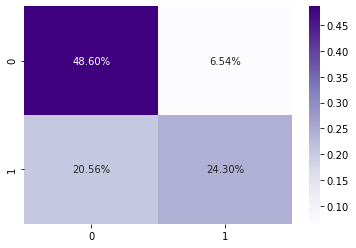

In [79]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples')

In [75]:
coefs = pd.Series(lr.coef_[0], index=tfidf_vect.get_feature_names())
coefs.sort_values(ascending=True)


crow        -1.179505
look        -0.680149
khaleesi    -0.530302
soldier     -0.513324
girl        -0.507708
               ...   
lannister    0.804825
oberyn       0.826622
die          0.870760
aye          1.066770
father       1.073951
Length: 5779, dtype: float64

In [ ]:
rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train_dtm, y_train)
y_pred_class = rf.predict(X_test_dtm)
print('accuracy:',(rf.oob_score_))
print('baseline:',1-chars.is_noble.mean())

In [ ]:
feat = pd.Series(rf.feature_importances_, index=tfidf_vect.get_feature_names())
feat.sort_values()

In [ ]:
print('random forest confusion matrix:')
metrics.confusion_matrix(y_test, y_pred_class)